In [22]:
#Copying images to training, validation, and test directories
import os, shutil

original_dataset_dir = '/home/shahir/Projects/DeepLearning/train'
base_dir = '/home/shahir/Projects/DeepLearning/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)
'''
# training dataset for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#validation dataset for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#testing dataset for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# dogs training 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# dogs validation 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# dogs test 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''


"\n# training dataset for cats\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\n#validation dataset for cats\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(validation_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\n#testing dataset for cats\nfnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(test_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\n# dogs training \nfnames = ['dog.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_dogs_dir, fname)\n    shutil.copyfile(src, dst)\n    \n# dogs validation \nfnames = 

In [23]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [31]:
#model compilation 
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])


In [32]:
#data preprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255) #Rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #target directory
    target_size = (150,150), # resize all images to 150x150
    batch_size=20,
    class_mode='binary' # Because you use binary_crossentropy loss, you need binary labels.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [34]:
'''
When using fit_generator , you can pass a validation_data argument, much as
with the fit method. It’s important to note that this argument is allowed to be a data
generator, but it could also be a tuple of Numpy arrays. If you pass a generator as
validation_data , then this generator is expected to yield batches of validation data
endlessly; thus you should also specify the validation_steps argument, which tells
the process how many batches to draw from the validation generator for evaluation.
'''
#fitting the model using batch generator 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 27s 267ms/step - loss: 0.7343 - accuracy: 0.4989 - val_loss: 0.6896 - val_accuracy: 0.5170
Epoch 2/30
100/100 [==============================] - 26s 264ms/step - loss: 0.6925 - accuracy: 0.5515 - val_loss: 0.6726 - val_accuracy: 0.5830
Epoch 3/30
100/100 [==============================] - 26s 263ms/step - loss: 0.6706 - accuracy: 0.6153 - val_loss: 0.6234 - val_accuracy: 0.6520
Epoch 4/30
100/100 [==============================] - 26s 264ms/step - loss: 0.6026 - accuracy: 0.6920 - val_loss: 0.6129 - val_accuracy: 0.6930
Epoch 5/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5767 - accuracy: 0.7240 - val_loss: 0.5885 - val_accuracy: 0.7110
Epoch 6/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4978 - accuracy: 0.7552 - val_loss: 0.5722 - val_accuracy: 0.7200
Epoch 7/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4015 - accuracy: 0.8202 - val_loss: 0.6466 - val_ac

KeyboardInterrupt: 

In [11]:
#saving the model 
model.save('cats_and_dogs_small_1.h5')

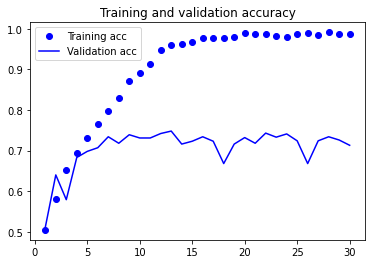

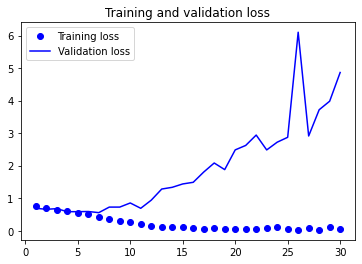

In [15]:
#Plotting the loss and accuracy during training 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

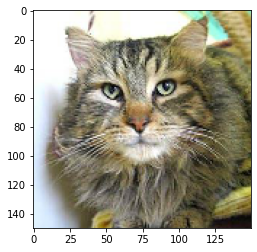

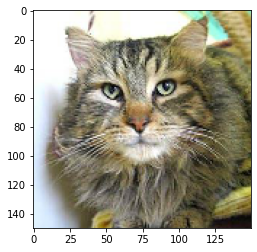

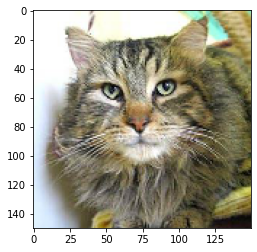

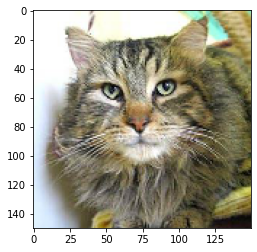

In [11]:
'''
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) #Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) #Reshapes it to (1, 150, 150, 3)


Generates batches of
randomly transformed
images. Loops indefinitely,
so you need to break the
loop at some point!

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break;
plt.show()
'''

In [26]:
# Defining a new convnet that includes dropout
from tensorflow.keras import models 
from tensorflow.keras import layers 
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [39]:
# using dropout and augmentation 

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [41]:


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)



Epoch 1/30
100/100 [==============================] - 27s 272ms/step - loss: 0.5894 - accuracy: 0.6965 - val_loss: 0.6329 - val_accuracy: 0.6580
Epoch 2/30
100/100 [==============================] - 27s 273ms/step - loss: 0.5789 - accuracy: 0.7050 - val_loss: 0.6058 - val_accuracy: 0.7150
Epoch 3/30
100/100 [==============================] - 28s 274ms/step - loss: 0.5843 - accuracy: 0.7140 - val_loss: 0.5312 - val_accuracy: 0.7290
Epoch 4/30
100/100 [==============================] - 28s 275ms/step - loss: 0.5853 - accuracy: 0.6970 - val_loss: 0.5275 - val_accuracy: 0.7310
Epoch 5/30
100/100 [==============================] - 28s 275ms/step - loss: 0.5656 - accuracy: 0.7160 - val_loss: 0.6127 - val_accuracy: 0.7250
Epoch 6/30
100/100 [==============================] - 28s 276ms/step - loss: 0.5672 - accuracy: 0.7310 - val_loss: 0.5518 - val_accuracy: 0.7520
Epoch 7/30
100/100 [==============================] - 28s 278ms/step - loss: 0.5826 - accuracy: 0.7055 - val_loss: 0.5574 - val_ac